# Pràctica 1

In [96]:
import pandas as pd
import plotly.graph_objects as go

import igraph
import matplotlib.pyplot as plt

## Leer csvs

In [143]:
airports = pd.read_csv('csv/airports.csv', sep=',', header=0, na_values='\\N', true_values=['Y'], false_values=['"N"'], quotechar='"', encoding="latin-1")
airports

,Id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,TimeZone,DST,TZ,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,NaN,NaN,NaN,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,NaN,NaN,NaN,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,NaN,NaN,NaN,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,NaN,NaN,NaN,airport,OurAirports


In [93]:
airlines = pd.read_csv('csv/airlines.csv', sep=',',header=0, na_values='\\N', true_values=['Y'], false_values=['N'], quotechar='"', encoding="latin-1")
airlines.Active = airlines.Active.transform(lambda x: True if x == 'Y' else False)
airlines

,Id,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,Unknown,NaN,-,NaN,NaN,NaN,True
1,1,Private flight,NaN,-,NaN,NaN,NaN,True
2,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,False
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,True
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,False
...,...,...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,True
6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,False
6159,21268,Jetgo Australia,NaN,JG,NaN,NaN,Australia,True
6160,21270,Air Carnival,NaN,2S,NaN,NaN,India,True


In [140]:
routes = pd.read_csv('csv/routes.csv', sep=',', header=0, na_values='\\N', true_values=['Y'], false_values=['"N"'], quotechar='"', encoding="latin-1")
routes = routes.fillna(-1)
routes = routes[routes.Airline_ID != float('nan')]
routes = routes[routes.Src_A_ID != float('nan')]
routes = routes[routes.Dst_A_ID != float('nan')]
routes.Airline_ID = routes.Airline_ID.astype(int)
routes.Src_A_ID = routes.Src_A_ID.astype(int)
routes.Dst_A_ID = routes.Dst_A_ID.astype(int)
routes

,Airline,Airline_ID,Src_A,Src_A_ID,Dst_A,Dst_A_ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,-1,0,CR2
1,2B,410,ASF,2966,KZN,2990,-1,0,CR2
2,2B,410,ASF,2966,MRV,2962,-1,0,CR2
3,2B,410,CEK,2968,KZN,2990,-1,0,CR2
4,2B,410,CEK,2968,OVB,4078,-1,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,-1,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,-1,0,734
67660,ZM,19016,FRU,2912,DME,4029,-1,0,734
67661,ZM,19016,FRU,2912,OSS,2913,-1,0,734


In [95]:
countries = pd.read_csv('csv/countries.csv', sep=',', header=0, na_values='\\N', true_values=['Y'], false_values=['"N"'], quotechar='"', encoding="latin-1")
countries

,Name,iso_code,dafif_code
0,"Bonaire, Saint Eustatius and Saba",BQ,NaN
1,Aruba,AW,AA
2,Antigua and Barbuda,AG,AC
3,United Arab Emirates,AE,AE
4,Afghanistan,AF,AF
...,...,...,...
256,Samoa,WS,WS
257,Eswatini,SZ,WZ
258,Yemen,YE,YM
259,Zambia,ZM,ZA


## Fusión de tablas

In [158]:
# Source Airport info
df = pd.merge(routes, airports, left_on='Src_A_ID',right_on='Id')
df = df.rename(columns={"Name": "Src_Name", "Country": "Src_Country"})

# Destination Airport info
df = pd.merge(df, airports, left_on='Dst_A_ID', right_on='Id')
df = df.rename(columns={"Name": "Dst_Name", "Country": "Dst_Country"})

# Airline info
df = pd.merge(df, airlines, left_on='Airline_ID', right_on='Id')
df = df.rename(columns={"Name": "Airline_Name", "Country": "Airline_Country"})

df.columns

Index(['Airline', 'Airline_ID', 'Src_A', 'Src_A_ID', 'Dst_A', 'Dst_A_ID',
       'Codeshare', 'Stops', 'Equipment', 'Id_x', 'Src_Name', 'City_x',
       'Src_Country', 'IATA_x', 'ICAO_x', 'Latitude_x', 'Longitude_x',
       'Altitude_x', 'TimeZone_x', 'DST_x', 'TZ_x', 'Type_x', ' Source_x',
       'Id_y', 'Dst_Name', 'City_y', 'Dst_Country', 'IATA_y', 'ICAO_y',
       'Latitude_y', 'Longitude_y', 'Altitude_y', 'TimeZone_y', 'DST_y',
       'TZ_y', 'Type_y', ' Source_y', 'Id', 'Airline_Name', 'Alias', 'IATA',
       'ICAO', 'Callsign', 'Airline_Country', 'Active'],
      dtype='object')

## Construcción del grafo

### Muestra

In [240]:
r_airports = airports.sample(1000)

dfs = df[df.Src_A_ID.isin(r_airports.Id)]
dfs = dfs[dfs.Dst_A_ID.isin(r_airports.Id)]

dfs

,Airline,Airline_ID,Src_A,Src_A_ID,Dst_A,Dst_A_ID,Codeshare,Stops,Equipment,Id_x,...,Type_y,Source_y,Id,Airline_Name,Alias,IATA,ICAO,Callsign,Airline_Country,Active
142,S7,4329,HEL,421,SVX,2975,-1,0,319,421,...,airport,OurAirports,4329,S7 Airlines,Sibir Airlines,S7,SBI,SIBERIAN AIRLINES,Russia,True
143,S7,4329,KBP,2939,SVX,2975,-1,0,735,2939,...,airport,OurAirports,4329,S7 Airlines,Sibir Airlines,S7,SBI,SIBERIAN AIRLINES,Russia,True
199,S7,4329,SVX,2975,HEL,421,-1,0,319,2975,...,airport,OurAirports,4329,S7 Airlines,Sibir Airlines,S7,SBI,SIBERIAN AIRLINES,Russia,True
223,S7,4329,SVX,2975,KBP,2939,-1,0,735,2975,...,airport,OurAirports,4329,S7 Airlines,Sibir Airlines,S7,SBI,SIBERIAN AIRLINES,Russia,True
401,U6,5234,LCA,1197,SVX,2975,-1,0,320,1197,...,airport,OurAirports,5234,Ural Airlines,NaN,U6,SVR,SVERDLOVSK AIR,Russia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66663,4Y,1173,PKA,9744,BET,3599,-1,0,CNA,9744,...,airport,OurAirports,1173,Airbus France,NaN,4Y,RBU,AIRBUS FRANCE,France,False
66673,8E,1472,ORV,7181,OTZ,3693,-1,0,CNC,7181,...,airport,OurAirports,1472,Bering Air,NaN,8E,BRG,BERING AIR,United States,True
66709,8E,1472,OTZ,3693,ORV,7181,-1,0,CNC,3693,...,airport,OurAirports,1472,Bering Air,NaN,8E,BRG,BERING AIR,United States,True
66763,TY,2825,UVE,2004,LIF,2000,-1,0,DHT,2004,...,airport,OurAirports,2825,Iberworld,NaN,TY,IWD,NaN,Spain,True


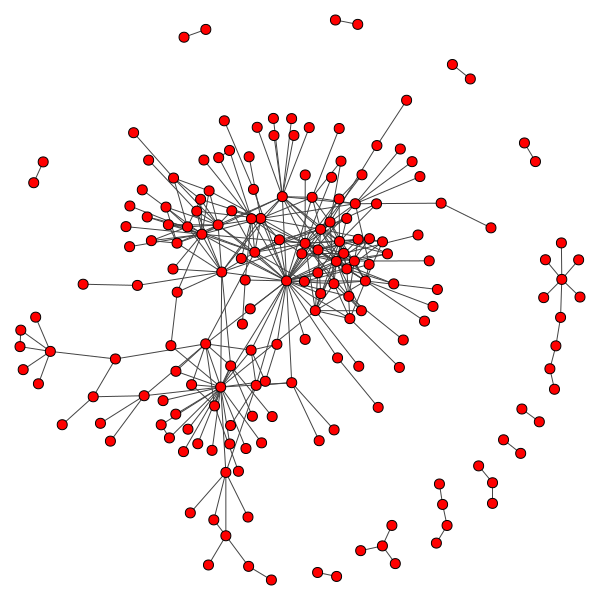

In [241]:
g = igraph.Graph()

for i, row in dfs.iterrows():
    if 'name' not in g.vs.attribute_names():
        g.add_vertex(str(row.Src_A_ID))
        g.add_vertex(str(row.Dst_A_ID))
    else:
        if str(row.Src_A_ID) not in g.vs['name']:
            g.add_vertex(str(row.Src_A_ID))
        if str(row.Dst_A_ID) not in g.vs['name']:
            g.add_vertex(str(row.Dst_A_ID))
    if not g.are_connected(str(row.Src_A_ID), str(row.Dst_A_ID)):
        g.add_edge(str(row.Src_A_ID), str(row.Dst_A_ID))

igraph.plot(g, bbox=(600, 600), vertex_size=10) # Cairo

In [232]:
g = igraph.Graph()
g.add_vertex('5')
g.add_vertex('55')
# g.add_edge('5','55')

g.are_connected('5', '55')

# if 'name' in g.vs.attribute_names() and str(5) in g.vs['name']:
#     print(5)
# igraph.plot(g, bbox=(200, 200)) # Cairo
# print(g.vs.attribute_names())

False

Pintar nodes i arestes al mapa:

In [242]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = [10, 20, 30],
    lat = [10, 20,30],
    marker = {'size': 10}))

fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = [-50, -60,40],
    lat = [30, 10, -20],
    marker = {'size': 10}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': 10, 'lat': 10},
        'style': "stamen-terrain",
        'center': {'lon': -20, 'lat': -20},
        'zoom': 1})

fig.show()

In [243]:
import numpy as np; np.random.seed(42)
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


df = pd.DataFrame({"lon1" : np.random.randint(-15,30,10),
                   "lat1" : np.random.randint(33,66,10),
                   "lon2" : np.random.randint(-15,30,10),
                   "lat2" : np.random.randint(33,66,10)})

m = Basemap(llcrnrlon=-12,llcrnrlat=30,urcrnrlon=50,urcrnrlat=69.,
             resolution='i', projection='tmerc', lat_0 = 48.9, lon_0 = 15.3)

m.drawcoastlines(linewidth=0.72, color='gray')
m.drawcountries(zorder=0, color='gray')


lon1, lat1 = m(df.lon1.values, df.lat1.values)
lon2, lat2 = m(df.lon2.values, df.lat2.values)

pts = np.c_[lon1, lat1, lon2, lat2].reshape(len(lon1), 2, 2)
plt.gca().add_collection(LineCollection(pts, color="crimson", label="Lines"))

m.plot(lon1, lat1, marker="o", ls="", label="Start")
m.plot(lon2, lat2, marker="o", ls="", label="Fin")

plt.legend()
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'